In [49]:
import pandas as pd
import numpy as np
import re
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
%matplotlib inline

In [54]:
chi_vac = pd.read_csv('https://data.cityofchicago.org/resource/2vhs-cf6b.csv')
chi_vac['date'] = pd.to_datetime(chi_vac['date']).dt.normalize() #to remove time values from showing
chi_vac.set_index('date',inplace=True)
chi_vac.head()

,total_doses_daily,total_doses_cumulative,_1st_dose_daily,_1st_dose_cumulative,_1st_dose_percent_population,vaccine_series_completed_daily,vaccine_series_completed_cumulative,vaccine_series_completed_percent_population,total_doses_daily_age_0_17,total_doses_daily_age_18_29,...,vaccine_series_completed_daily_age_unknown_age,vaccine_series_completed_daily_female,vaccine_series_completed_daily_male,vaccine_series_completed_daily_unknown_gender,vaccine_series_completed_daily_latinx,vaccine_series_completed_daily_asian_non_latinx,vaccine_series_completed_daily_black_non_latinx,vaccine_series_completed_daily_white_non_latinx,vaccine_series_completed_daily_other_race_non_latinx,vaccine_series_completed_daily_unknown_race_ethnicity
date,,,,,,,,,,,,,,,,,,,,,
2021-03-26,19680,1038333,13862,700457,0.260,6371,354657,0.132,49,3634,...,0,3569,2773,29,2466,376,1572,1682,113,162
2021-03-25,26022,1018653,18041,686595,0.255,8687,348286,0.129,68,4430,...,0,4842,3821,24,2570,441,2013,3154,220,289
2021-03-24,23212,992631,17396,668554,0.248,6588,339599,0.126,66,3776,...,0,3591,2992,5,2103,375,1463,2275,120,252
2021-03-23,22871,969419,17717,651158,0.242,5996,333011,0.124,54,3499,...,0,3189,2790,17,2058,388,1220,1915,159,256
2021-03-22,20153,946548,15743,633441,0.235,4971,327015,0.121,45,3242,...,0,2620,2305,46,1550,265,1289,1518,94,255


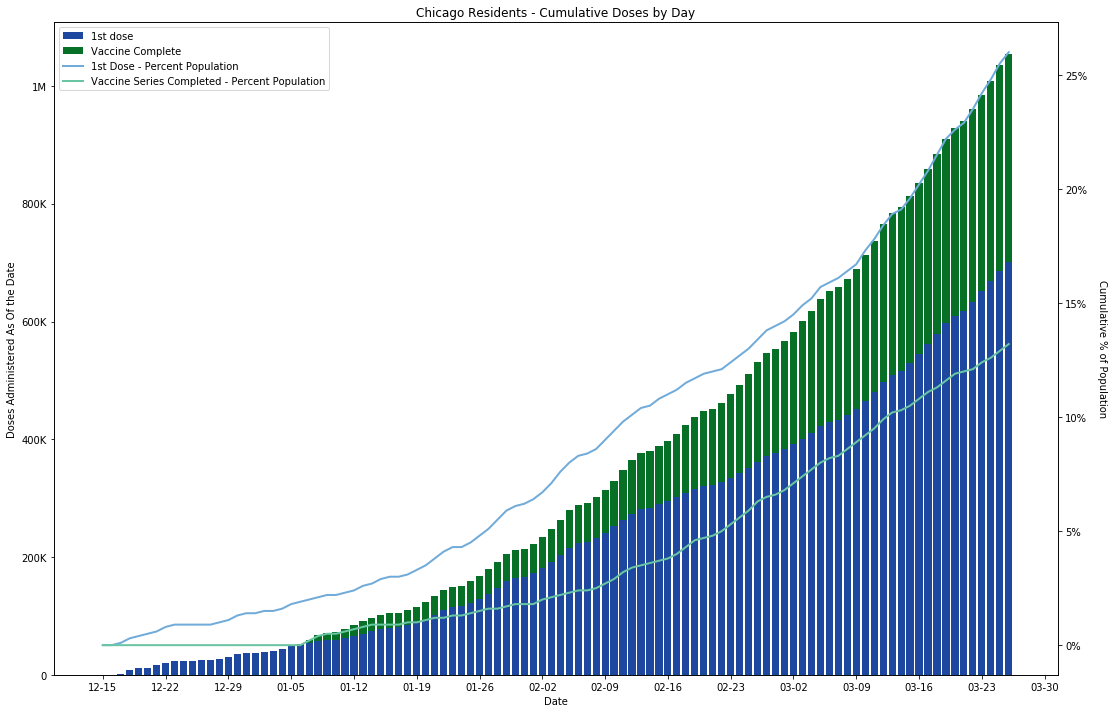

In [51]:
# Recreating graph of City of Chicago Data Portal
# https://data.cityofchicago.org/Health-Human-Services/COVID-19-Daily-Vaccinations-Chicago-Residents-Cumu/rna5-2pgy

fig, ax = plt.subplots(figsize=(18, 12))
ax.bar(chi_vac.index, chi_vac['_1st_dose_cumulative'], color='#1e489f', label='1st dose')
ax.bar(chi_vac.index, chi_vac['vaccine_series_completed_cumulative'], color='#067126', bottom=chi_vac['_1st_dose_cumulative'], label='Vaccine Complete')

# Adds K and M abbreviation to the y axis
mkfunc = lambda x, pos: '%1.fM' % (x * 1e-6) if x >= 1e6 else '%1.fK' % (x * 1e-3) if x >= 1e3 else '%1.f' % x
mkformatter = matplotlib.ticker.FuncFormatter(mkfunc)
ax.yaxis.set_major_formatter(mkformatter)

axes2 = plt.twinx()
axes2.plot(chi_vac.index, chi_vac['_1st_dose_percent_population'], color='#71abd9', label='1st Dose - Percent Population', linewidth=2)
axes2.plot(chi_vac.index, chi_vac['vaccine_series_completed_percent_population'], color='#6ac5a3', label='Vaccine Series Completed - Percent Population', linewidth=2)
axes2.yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(1, decimals=0))

#Shows the Month and Day on x axis on every Tuesday
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

ax.set_xlabel('Date')
ax.set_ylabel('Doses Administered As Of the Date')
axes2.set_ylabel('Cumulative % of Population', rotation=270, labelpad=20)
ax.set_title('Chicago Residents - Cumulative Doses by Day')
fig.legend(loc="upper left", bbox_to_anchor=(0,1), bbox_transform=ax.transAxes)

plt.show()

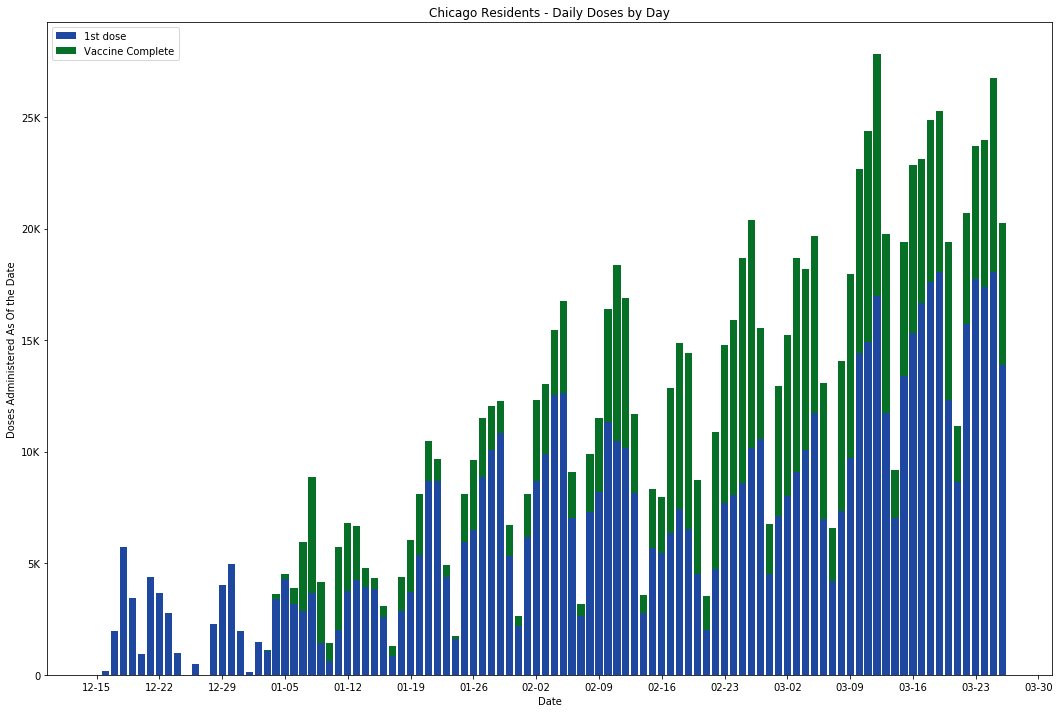

In [52]:
# Graph of daily doses administered by type

fig, ax = plt.subplots(figsize=(18, 12))
ax.bar(chi_vac.index, chi_vac['_1st_dose_daily'], color='#1e489f', label='1st dose')
ax.bar(chi_vac.index, chi_vac['vaccine_series_completed_daily'], color='#067126', bottom=chi_vac['_1st_dose_daily'], label='Vaccine Complete')

# Adds K and M abbreviation to the y axis
mkfunc = lambda x, pos: '%1.fM' % (x * 1e-6) if x >= 1e6 else '%1.fK' % (x * 1e-3) if x >= 1e3 else '%1.f' % x
mkformatter = matplotlib.ticker.FuncFormatter(mkfunc)
ax.yaxis.set_major_formatter(mkformatter)


#Shows the Month and Day on x axis on every Tuesday
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

ax.set_xlabel('Date')
ax.set_ylabel('Doses Administered As Of the Date')
ax.set_title('Chicago Residents - Daily Doses by Day')
fig.legend(loc="upper left", bbox_to_anchor=(0,1), bbox_transform=ax.transAxes)

plt.show()